Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Statistical Summary:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.

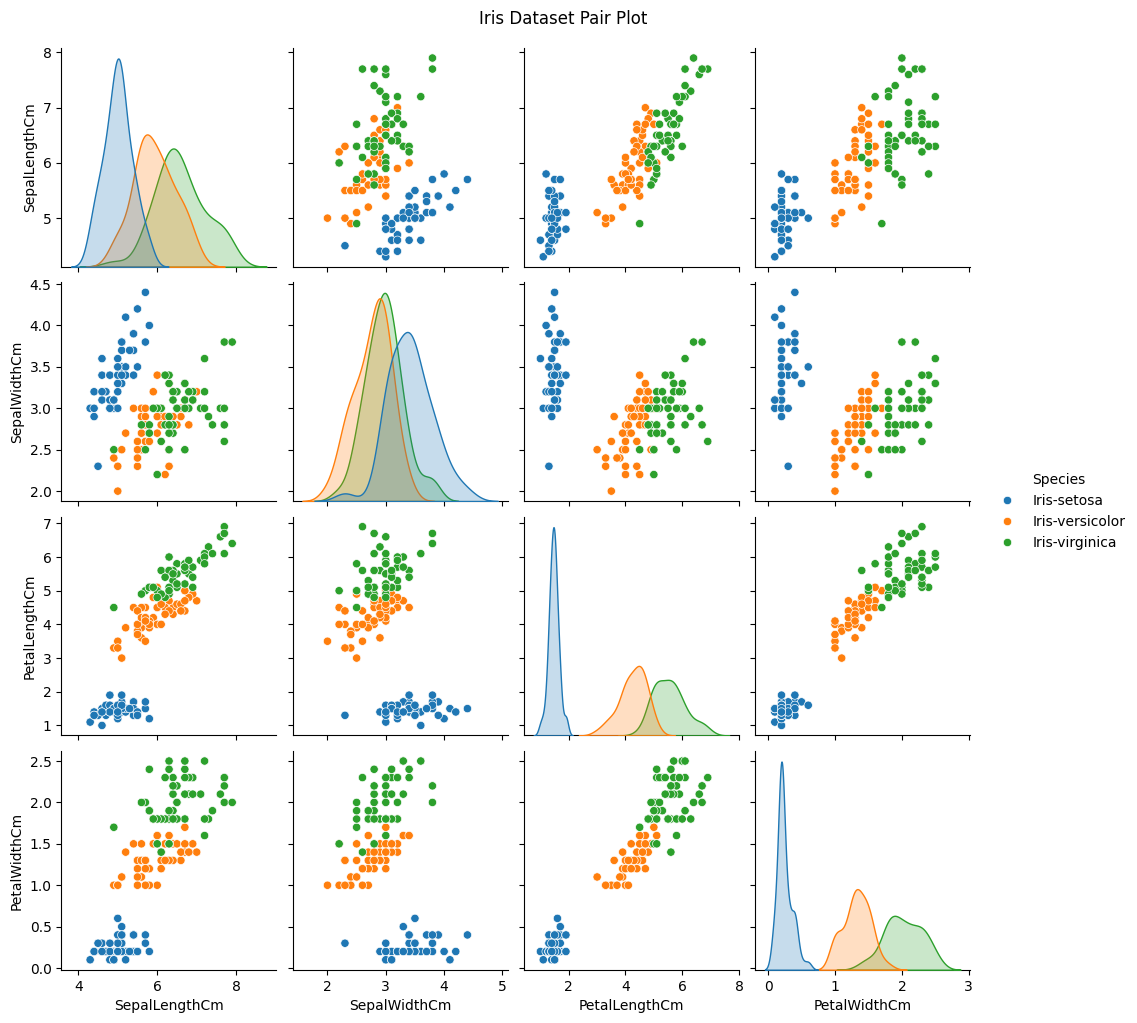


Model Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



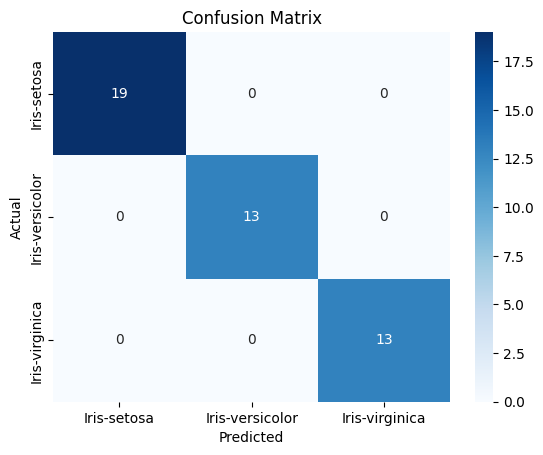


Feature Importance:
         Feature  Importance
3   PetalWidthCm    0.436574
2  PetalLengthCm    0.417326
0  SepalLengthCm    0.104614
1   SepalWidthCm    0.041486


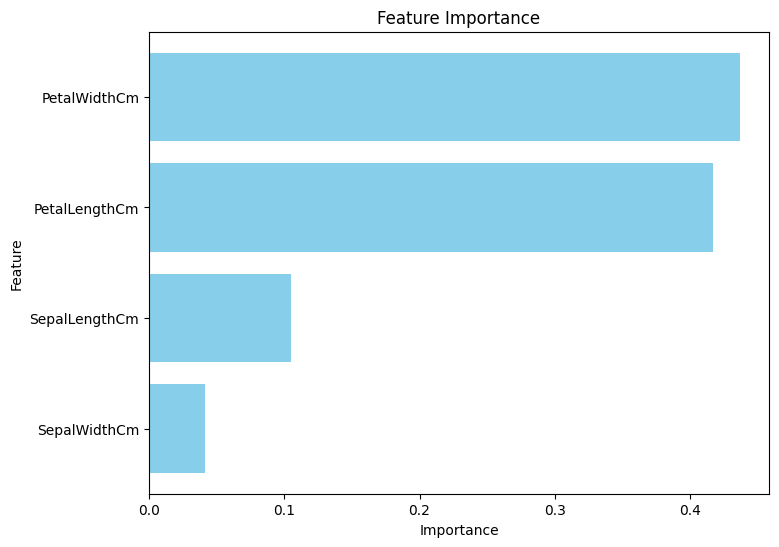

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_url = "/content/Iris.csv"
iris_data = pd.read_csv(file_url)

# Drop unnecessary column
if 'Id' in iris_data.columns:
    iris_data = iris_data.drop(columns=['Id'])

# Display dataset info
print("Dataset Overview:")
print(iris_data.info())
print("\nStatistical Summary:")
print(iris_data.describe())

# Check and handle missing values
print("\nMissing Value Analysis:")
print(iris_data.isnull().sum())
iris_data = iris_data.dropna()

# Pairplot visualization
sns.pairplot(iris_data, hue='Species')
plt.suptitle("Iris Dataset Pair Plot", y=1.02)
plt.show()

# Feature and target selection
iris_features = iris_data.drop(columns=['Species'])
iris_target = iris_data['Species']

# Encode target labels
encoder = LabelEncoder()
iris_target = encoder.fit_transform(iris_target)

# Split data
train_features, test_features, train_labels, test_labels = train_test_split(iris_features, iris_target, test_size=0.3, random_state=42)

# Train Random Forest model
iris_classifier = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
iris_classifier.fit(train_features, train_labels)

# Predict on test data
predicted_labels = iris_classifier.predict(test_features)

# Model evaluation
accuracy = accuracy_score(test_labels, predicted_labels)
print("\nModel Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(test_labels, predicted_labels))

# Confusion matrix visualization
conf_matrix = confusion_matrix(test_labels, predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature importance
feature_importance = iris_classifier.feature_importances_
importance_data = pd.DataFrame({'Feature': iris_features.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_data)

plt.figure(figsize=(8, 6))
plt.barh(importance_data['Feature'], importance_data['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()
